# MTH5001:  Introduction to Computer Programming 2021/22

## Final Report Project: "Atmospheric Carbon Dioxide Levels"







---
### The Keeling curve
This project deals with the analysis of atmospheric carbon dioxide levels as measured by the Mauna Loa Observatory in Hawaii over the last 50 years. This data is known as the [Keeling curve]( https://en.wikipedia.org/wiki/Keeling_Curve).

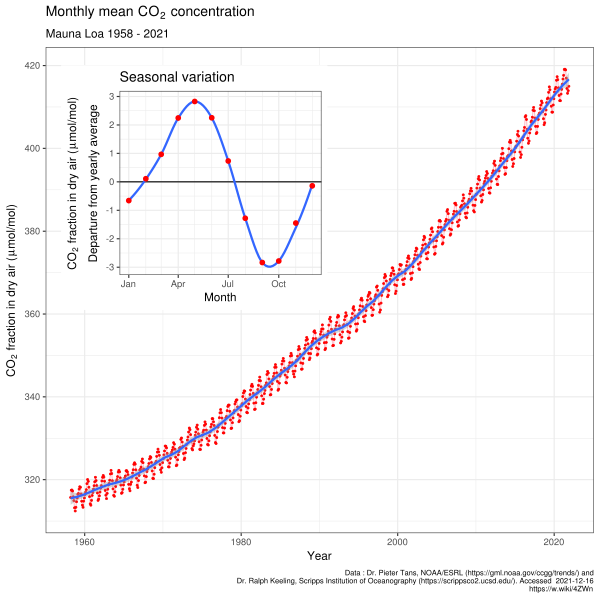

This project consists of **four parts**. In each of the parts you will need to code up some specific functions, run some code, and respond to some questions. Recall that all code needs to be properly documented with `# comments`, and the explanations in these comments will indeed be assessed and you will receive lots of marks for adequate documentation. 



* The **first part** is about loading and visualising historical $CO_2$ levels in the atmosphere.

* The **second part** asks you to write code for polynomial fitting.

* The **third part** compares global and local trend fitting.

* The **fourth part** focusses on the seasonal variations.

<br />


---

The following code box is used to load any necessary modules. **You may not import any other modules.**

In [4]:
#DO NOT CHANGE THE CONTENT OF THIS CODE BOX
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
# Changes the dimentions of the plots to be easier to read.
plt.rcParams['figure.figsize'] = (15,3)

# Part 1: Loading and cleaning data [20 marks total]
*** ***

<div class="alert alert-block alert-danger">
    
Please remember to write plenty of `# comments` in the code cells. Mark scheme is depicted in each question. 50% of the marks will go to assess the actual code, and 50% of the marks will go to assess the `# comments`. Remember also to **reference** any sources you used. If you used any code or coding ideas you found elsewhere, you are encouraged to do that in the `# comments`.


---

**[1.1] [6 marks]** Load the data from the file "Mauna_Loa_CO2.csv" into a pandas dataframe named `Mauna_Loa_df` and display it. You should get a dataframe with 2494 rows and 9 columns with the first column looking as follows:
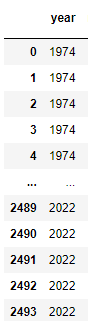

If you encounter difficulties doing this it may help to inspect the content of the csv file in a text editor.

---

In [8]:
# Loads data from the csv file using the 'comment' argument to omit irrelevant lines beginning with '#'.
Mauna_Loa_df = pd.read_csv('Mauna_Loa_CO2.csv', comment = '#')
Mauna_Loa_df

,year,month,day,decimal,average,ndays,1 year ago,10 years ago,increase since 1800
0,1974,5,19,1974.3795,333.37,5,-999.99,-999.99,50.40
1,1974,5,26,1974.3986,332.95,6,-999.99,-999.99,50.06
2,1974,6,2,1974.4178,332.35,5,-999.99,-999.99,49.60
3,1974,6,9,1974.4370,332.20,7,-999.99,-999.99,49.65
4,1974,6,16,1974.4562,332.37,7,-999.99,-999.99,50.06
...,...,...,...,...,...,...,...,...,...
2489,2022,1,30,2022.0808,419.19,7,416.89,393.28,138.47
2490,2022,2,6,2022.1000,418.38,6,417.04,393.99,137.55
2491,2022,2,13,2022.1192,419.76,7,416.59,394.02,138.82
2492,2022,2,20,2022.1384,419.62,7,416.30,394.30,138.57


---
**[1.2] [6 marks]** Using this dataframe, produce a plot of the carbon dioxide data contained therein versus time. The relevant columns in the csv file are "average" and "decimal", containing average carbon dioxide levels in ppm and the date in years, respectively. 

Clearly label the content, a plot simply showing the defaults "average" and "decimal" will be insufficient. 

If you encounter difficulties it may help to inspect the content of the csv file or the dataframe directly.

---

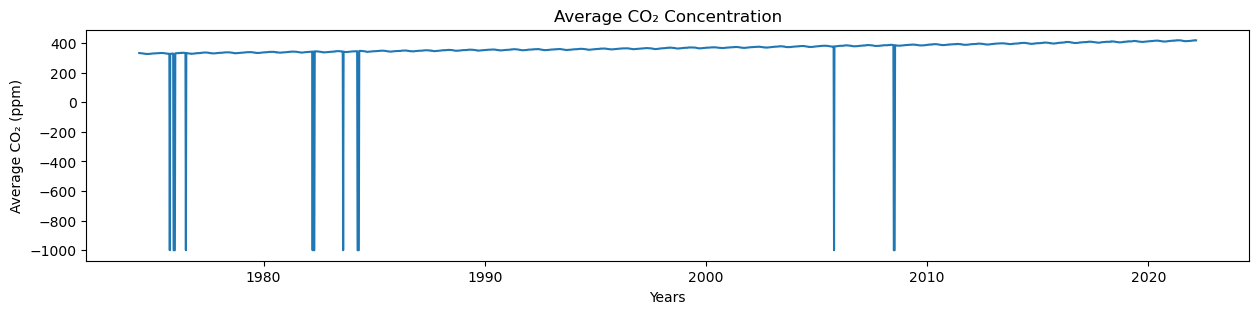

In [10]:
# This plots the 'decimal' column in the x axis and the 'average' column in the y axis.
plt.plot(Mauna_Loa_df['decimal'], Mauna_Loa_df['average'])

# The code below labels the axes and title appropriately.
plt.title('Average CO₂ Concentration')
plt.xlabel('Years')
plt.ylabel('Average CO₂ (ppm)')

plt.show()

---
**[1.3] [8 marks]** In the above plot you will have noted irregularities, presumably due to missing data. Describe these and amend the dataframe accordingly. Replot.


---

*The irregularities have value -999.99. Therefore, my code will look for all values of average that are equal to -999.99 and omit them.*

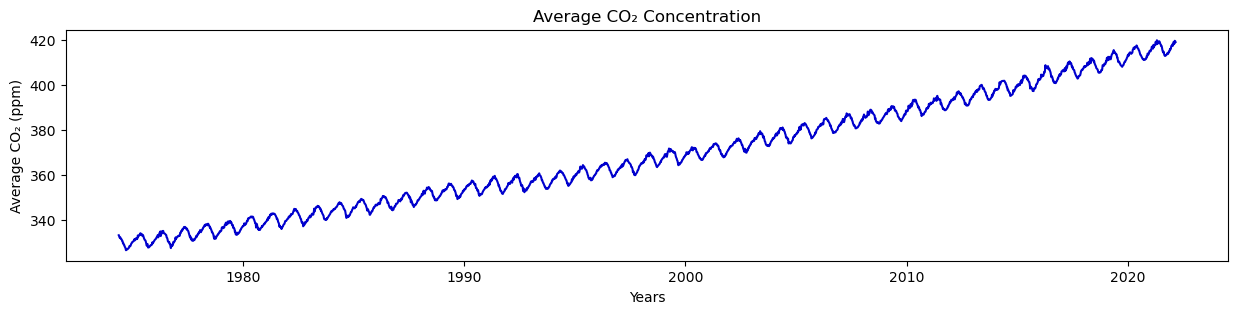

In [13]:
# Produces a dataframe for which column average has value -999.99.
irregularities = Mauna_Loa_df [Mauna_Loa_df['average'] == -999.99]

# Gets names of indexes for which column average has value -999.99.
indexNames = irregularities.index 

# Drop these rows from the original dataframe using inplace to modify the original dataframe.
Mauna_Loa_df.drop(indexNames, inplace = True)

# Reference: https://thispointer.com/python-pandas-how-to-drop-rows-in-dataframe-by-conditions-on-column-values/

# Plotting is done as before.
plt.plot(Mauna_Loa_df['decimal'], Mauna_Loa_df['average'], color = 'mediumblue')

plt.title('Average CO₂ Concentration')       
plt.xlabel('Years')
plt.ylabel('Average CO₂ (ppm)')

plt.show()


# Part 2: Polynomial fitting [30 marks total]
*** ***

<div class="alert alert-block alert-danger">
    
Please remember to write plenty of `# comments` in the code cells. Mark scheme is depicted in each question. 50% of the marks will go to assess the actual code, and 50% of the marks will go to assess the `# comments`. Remember also to **reference** any sources you used. If you used any code or coding ideas you found elsewhere, you are encouraged to do that in the `# comments`.




In this section you will develop a polynomial fitting routine in order to estimate the overall trend in the carbon dioxide curve. For this, you might want to refer to Section 7.7 in the [Linear Algebra lecture notes]( https://qmplus.qmul.ac.uk/pluginfile.php/2820808/mod_resource/content/3/notes2019.pdf) which was covered in week 11 of last term, in particular Theorem 7.35.

## Background information

In many applications, we might be given a set of data points

$$(x_1,y_1), (x_2,y_2), \ldots, (x_n,y_n)$$

in the $x,y$-plane, and required to determine whether there is a relationship between the $x$ variable and the $y$ variable. 
For example, a financial analyst might need to determine whether there is a relationship between two stock prices, while a climate scientist might need to know whether temperatures are related to levels of a certain pollutant in the atmosphere.

A common way to determine whether two data sets $x_1, x_2, \ldots, x_n$ and $y_1, y_2, \ldots, y_n$ are related is to find a function

$$y = f(x)$$

that 'best fits' the data, so that each $y_i$ is approximately equal to $f(x_i)$, with very small error. 

In order to find the 'best fit' the data, one attempts to minimise the **sum of squares of the errors (or "SSE")**,

$$SSE = \sum_{i=1}^n (y_i - f(x_i))^2$$

In other words, we want to minimise the sums of the squares of all the differences between the actual $y$-values (the $y_i$) and the 'predicted' $y$-values by substituting the corresponding $x_i$ values into the equation $y = f(x)$.

This process is called **least squares regression**. 

The function $f(x)$ usually depends on certain parameters for which we need to solve. 
For example, to determine whether the $x$- and $y$-variables have a **linear relationship**, we would use a linear function

$$f(x) = a_0 + a_1 x$$

and try to find the parameters $a_0$ and $a_1$ that make $f(x)$ 'best fit' the data. 
This means that we want to find the coefficients $a_0$ and $a_1$ for which the quantity
$$SSE = \sum_{i=1}^n (y_i - a_0 - a_1x_i)^2$$ is minimised.

More generally, **polynomial (least squares) regression** involves assuming that

$$f(x) = a_0 + a_1 x + a_2 x^2 + \cdots + a_m x^m$$

for some integer $m \geq 1$, and finding the parameters $a_0, a_1, a_2 \ldots, a_m$ that minimise SSE. In other words, we wish to fit a function

$$f(x) = a_0 + a_1x + a_2x^2 + \cdots a_mx^m$$

to our data points $(x_1,y_1), (x_2,y_2), \ldots, (x_n,y_n)$, where $m$ is some (chosen but arbitrarily large) positive integer. 
Observe that $m=1$ for linear regression, and $m=2$ for quadratic regression. 
We need to minimise

$$SSE = ||y - f(x)||^2.$$

for polynomial regression we therefore consider the matrices

$$X = \left[ \begin{array}{ll} 1&x_0&x_0^2&\cdots&x_0^m \\ 1&x_1&x_1^2&\cdots&x_1^m \\ \vdots&\vdots \\ 1&x_n&x_n^2&\cdots&x_n^m \end{array} \right], \quad
\mathbf{y} = \left[ \begin{array}{l} y_1 \\ y_2 \\ \vdots \\ y_n \end{array} \right], \quad \text{and} \quad
\mathbf{a} = \left[ \begin{array}{l} a_0 \\ a_1 \\ a_2 \\ \vdots \\ a_m \end{array} \right],$$

and we again find that

$$SSE = ||\mathbf{y} - X\mathbf{a}||^2,$$

meaning that $\mathbf{a}$ should be chosen to be a least squares solution of the system $X\mathbf{a} = \mathbf{y}$. 
Hence, we can find $\mathbf{a}$ by solving the normal equations

$$(X^TX)\mathbf{a} = X^T\mathbf{y}.$$

more details, in particular proofs, are given in Section 7.7 in the [Linear Algebra lecture notes]( https://qmplus.qmul.ac.uk/pluginfile.php/2820808/mod_resource/content/3/notes2019.pdf).

Python provides this functionality with the function polyfit. If you followed instructions precisely, the following should work for you.

```python

np.polyfit(Mauna_Loa_df["decimal"],Mauna_Loa_df["average"],2)


---
**[2.1] [5 marks]** Ensure that the above line of code works for your dataframe.

Note: you may have to consult the documentation about the meaning of the output.

---

In [20]:
# The function outputs an array with three entries as expected.
np.polyfit(Mauna_Loa_df['decimal'],Mauna_Loa_df['average'],2)

array([ 1.37021827e-02, -5.29516062e+01,  5.14639463e+04])

---
**[2.2] [10 marks]** This gives you coefficients for a quadratic fit. Plot the carbon dioxide data together with the fitted curve.

---

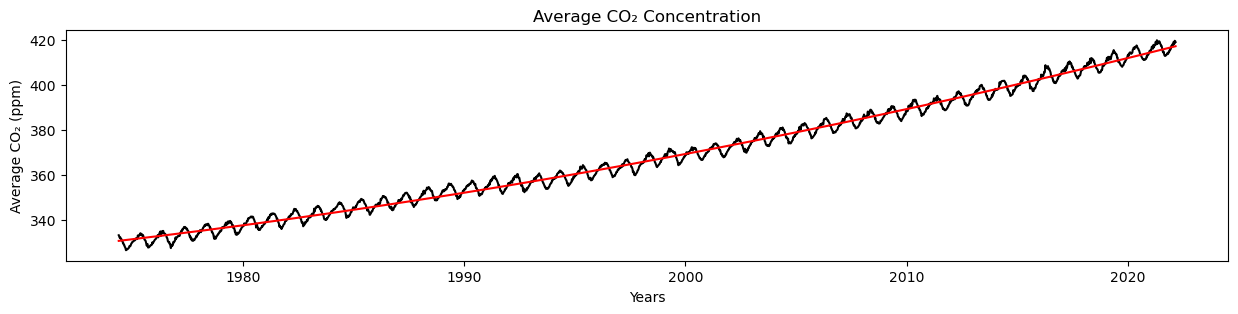

In [22]:
# Unpacking to assign coefficients. 
a2, a1, a0 = np.polyfit(Mauna_Loa_df['decimal'],Mauna_Loa_df['average'],2)

# Reassigning for better readability and useability. Will be used in future code blocks.
x_data = Mauna_Loa_df['decimal']
y_data = Mauna_Loa_df['average']

# Produces the fitted polynomial values using a lambda function. Since it is used once, the function is not assigned. 
y_global = (lambda x: a0 + a1*x + a2*x**2)(x_data) 

# Produces the plots of both the observed data and the fitted polynomial. 
plt.plot(x_data, y_data, color = 'black')    # Black and red for better contrast.
plt.plot(x_data, y_global, color = 'red')

# Plot labeling is done as before.
plt.title('Average CO₂ Concentration')       
plt.xlabel('Years')
plt.ylabel('Average CO₂ (ppm)')

plt.show()

---
**[2.3] [10 marks]** We now would like you to replace the polyfit function by your own code, without making reference to any provided fitting routines: write a function `least_squares_solver_polynomial` which takes as input a pandas dataframe with two numerical columns containing x and y values, and the degree $m$ of a polynomial (a positive integer), and computes the corresponding polynomial regression coefficients $a_0, a_1, a_2, \ldots, a_m$. The output of your function should be a **list** of the form `[a0, a1, a2, ..., am]` containing the $m+1$ coefficients $a_0, a_1, a_2, \ldots, a_m$ in that order.

Note: you are allowed to use np.linalg.solve(), but not np.polyfit() or similar.

---

In [24]:
def least_squares_solver_polynomial(df, m):
    """Accepts a dataframe (df) with two numerical columns and returns the coefficients of a fitted polynomial of degree m"""
    n = df.shape[0]    # Stores the number of rows
     
    x_data = np.reshape(np.array(df)[:, 0],(n,1))    # Splits the dataframe into two one dimentional arrays. 
    y_data = np.reshape(np.array(df)[:, 1],(n,1))    # Reshapes the one dimentional arrays into two dimentional arrays to allow matrix calculations.
                                                     # i.e. a.shape = (n,) => a.shape = (n,1).
    # Construction of the X matrix.
    X = np.empty((n,m+1))          # Initialises an empty array.
    for p in range(m+1):           # A loop is used to go column by column.
        X[:, p:p+1] = x_data**p    # Set's the values of the X matrix column by column.
        
    # The y matrix is already formed.
    y = y_data    

    # Directly applying np.linalg.solve() then reshaping into a one dimentional array so list() can be applied.
    return list(np.reshape( np.linalg.solve(X.T@X, X.T@y), (m+1) ))

---
**[2.4] [5 marks]** Run your least squares solver by using
```python
least_squares_solver_polynomial(Mauna_Loa_df[["decimal","average"]],2)
```

and compare the output with the above result obtained by using polyfit. How good is the agreement?

---

In [26]:
# Testing with m = 2 against np.polyfit(), answer is reversed as expexcted since polyfit returns in decending order.
polyfit = np.polyfit(Mauna_Loa_df['decimal'],Mauna_Loa_df['average'],2)[::-1]
my_fit = np.array(least_squares_solver_polynomial(Mauna_Loa_df[['decimal','average']],2))

print(f'{"Polyfit:":22}{polyfit}\n{"Least Squares Solver:":22}{my_fit}\n{"Difference:":22}{polyfit - my_fit}')

Polyfit:              [ 5.14639463e+04 -5.29516062e+01  1.37021827e-02]
Least Squares Solver: [ 5.14639720e+04 -5.29516318e+01  1.37021891e-02]
Difference:           [-2.56536516e-02  2.56761028e-05 -6.42433827e-09]


*The results agree to at least 5 significant figures.*


# Part 3: Global fitting versus local fitting [25 marks total]
*** ***

<div class="alert alert-block alert-danger">
    
Please remember to write plenty of `# comments` in the code cells. Mark scheme is depicted in each question. 50% of the marks will go to assess the actual code, and 50% of the marks will go to assess the `# comments`. Remember also to **reference** any sources you used. If you used any code or coding ideas you found elsewhere, you are encouraged to do that in the `# comments`.




If you look carefully you will notice that a quadratic fit is perhaps not the best way to capture the trend. There are two ways to improve this

1. You can experiment with taking higher degree polynomials
2. You can do local fits by computing averages

Note: if you did not manage to get least_squares_solver_polynomial to work, you are permitted to use polyfit instead.

---
**[3.1] [10 marks]** A good way to eyeball the quality of the fit and to check for systematic errors is to plot the difference between the actual and the fitted data. Produce plots showing this difference for fits with degrees one (linear) to six and describe what you can conclude.

---


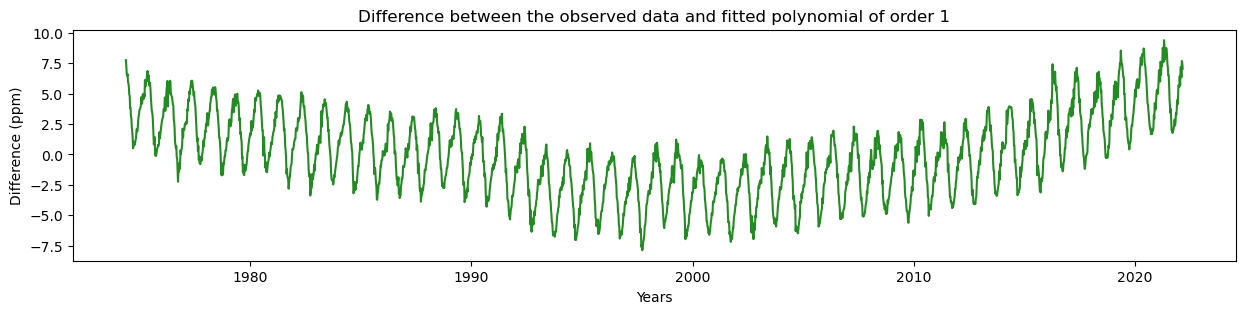

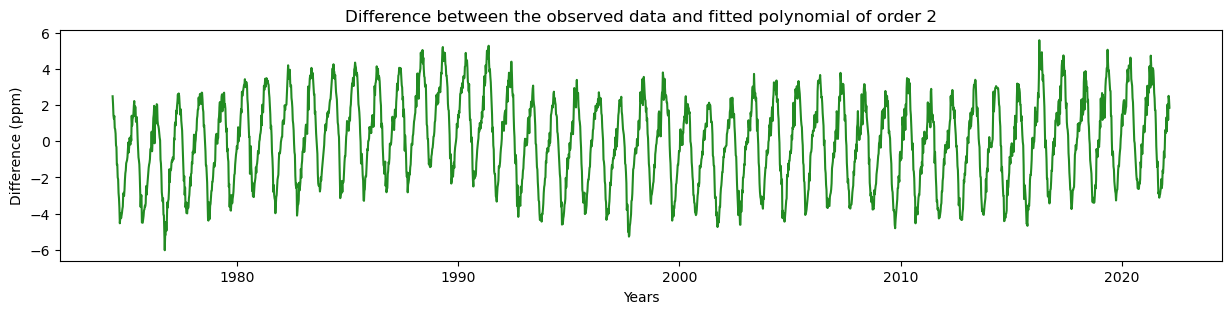

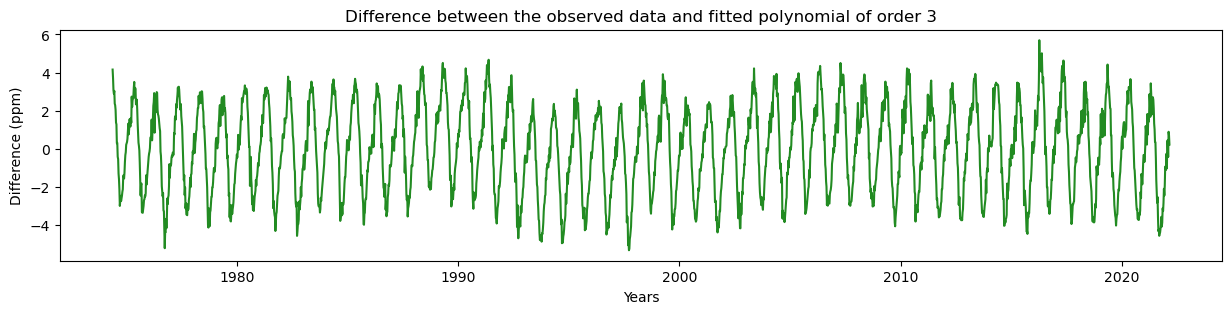

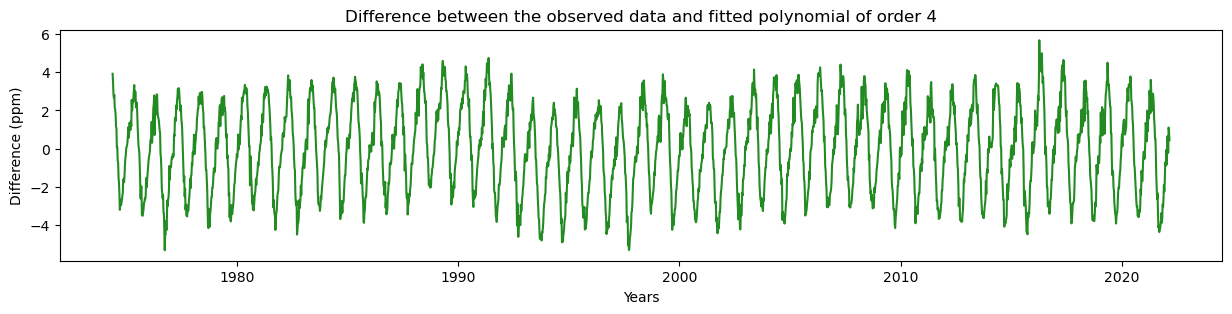

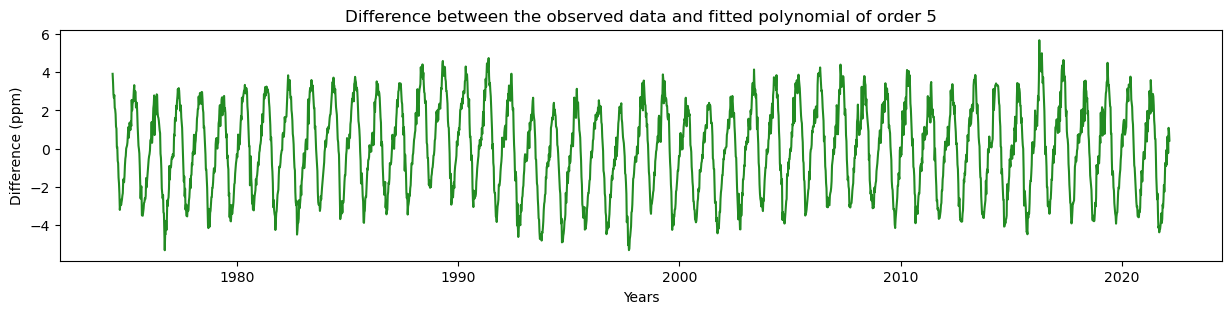

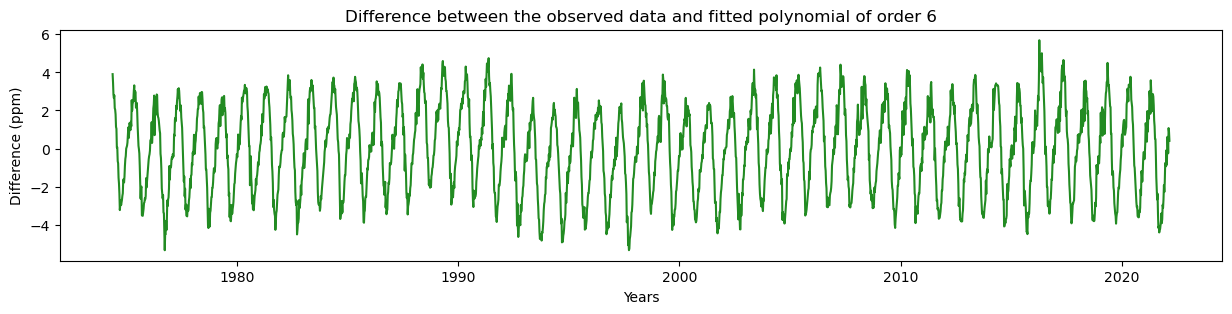

In [31]:
# Takes a list of coefficients and produces a polynomial from them.  
poly_builder = lambda a: lambda x: sum([a[n]*(x**n) for n in range(len(a))])

# Recall that x_data and y_data have been previously assigned.
# x_data = Mauna_Loa_df['decimal']
# y_data = Mauna_Loa_df['average']

for order in range(1,7):    # Only the order changes between the plots so a loop is used.
    # Produces a list of coefficients and feeds them into poly_builder() to produce the fitted polynomial.
    coefficients = least_squares_solver_polynomial(Mauna_Loa_df[['decimal','average']],order)    # List of coefficients.
    f = poly_builder(coefficients)             # Creates the fitted polynomial.
    y_global = f(x_data)                       # Produces the fitted values.
    y_global_difference = y_data - y_global    # Produces the y data to be plotted.
    
    # Produces a plot of the difference between the observed and fitted data against time. 
    plt.plot(x_data, y_global_difference, color = 'forestgreen')
    
    # Plot labeling is done as before.
    plt.title('Difference between the observed data and fitted polynomial of order {0}'.format(order))
    plt.xlabel('Years')
    plt.ylabel('Difference (ppm)')
    
    # Ensures data is plotted on a new plot.
    plt.show()

*The plots fail capture to local changes. The order 4-6 plots are almost identical, there are diminishing returns to increasing the order as they approach the same/very similar plot.*

---
**[3.2] [8 marks]** Now produce local fits. A very simple approach is to compute an average across a full year, with the date you want to estimate right in the middle. (Note: depending on how you code this, you may have to make reasonable adjustments towards the start and the end of your time range.)

To do this, you should first write a function
```python
def local_fit(data,xmin,xmax):
    # add your code
    return yaverage
```
that takes a  takes as input a pandas dataframe with two numerical columns containing x and y values, and two values xmin and xmax and returns the average over all values of y for which xmin < x < xmax.

As an example,
```python
local_fit(Mauna_Loa_df[["decimal","average"]],2000,2001)
```
should give a carbon dioxide concentration of around 369.7 ppm.

---


In [34]:
def local_fit(data,xmin,xmax):
    """Accepts a dataframe (data) with two numerical columns and returns the average over all y values for which xmin <= x < xmax."""
    x_data = data.iloc[:,0]                                # Isolates the first column.
    cut_data = data[(x_data >= xmin) & (x_data < xmax)]    # Removes data outside of range using bitwise operator and truth series. Reference: https://stackoverflow.com/questions/36921951/truth-value-of-a-series-is-ambiguous-use-a-empty-a-bool-a-item-a-any-o  
    cut_y_data = cut_data.iloc[:,1]                        # Isolates the second column of the cut data.
    return sum(cut_y_data) / len(cut_y_data)               # Computes the year average.

In [35]:
local_fit(Mauna_Loa_df[['decimal','average']],2000,2001)

369.7330188679245

---
**[3.3] [7 marks]** Now that you have the local averaging, produce two plots, one displaying the average per year and
one displaying the difference to that average.

---


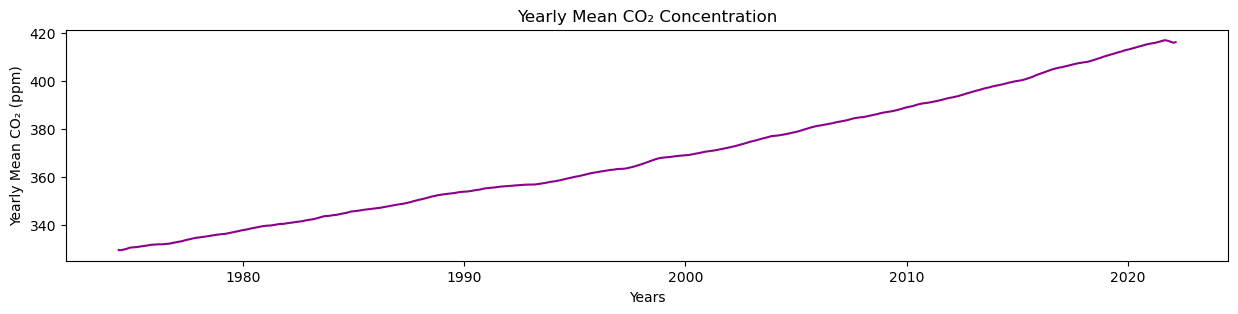

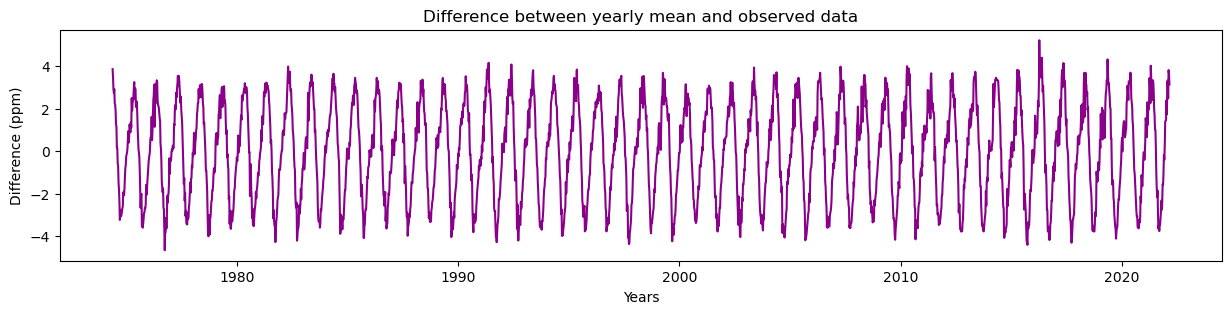

In [37]:
# Production of locally averaged data.
year_mean = []                                                                      # Creates an empty list.
for i in Mauna_Loa_df['decimal']:                                                   # Iterates over all values of the decimal column.
    year_mean.append(local_fit(Mauna_Loa_df[['decimal','average']],i-0.5,i+0.5))    # Computes a local average for each data point.
y_local = np.array(year_mean)                                                       # Array used for better computation.

# Recall that x_data and y_data have been previously assigned.
# x_data = Mauna_Loa_df['decimal']
# y_data = Mauna_Loa_df['average']

y_local_difference = y_data - y_local    # Computes the difference between the observed and locally averaged data.

# Plotting is done as before.
plt.plot(x_data, y_local, color = 'darkmagenta')
plt.title('Yearly Mean CO₂ Concentration')       
plt.xlabel('Years')
plt.ylabel('Yearly Mean CO₂ (ppm)')
plt.show()

plt.plot(x_data, y_local_difference, color = 'darkmagenta')
plt.title('Difference between yearly mean and observed data')       
plt.xlabel('Years')
plt.ylabel('Difference (ppm)')
plt.show()


# Part 4: Looking at the yearly variations [25 marks total]
*** ***

<div class="alert alert-block alert-danger">
    
Please remember to write plenty of `# comments` in the code cells. Mark scheme is depicted in each question. 50% of the marks will go to assess the actual code, and 50% of the marks will go to assess the `# comments`. Remember also to **reference** any sources you used. If you used any code or coding ideas you found elsewhere, you are encouraged to do that in the `# comments`.




For this part, we consider the difference between the carbon dioxide levels and the yearly averages. This data, while noisy, seems to oscillate with a period of one year, and it makes therefore sense to look at this oscillation more closely. In an nutshell, we are going to work towards obtaining a picture similar to the one in the inset in the Keeling curve figure at the top of this document.

---
**[4.1] [10 marks]** Plot the differences obtained in Question 3.3 versus the time of year as measured in months.

Note: it is advisable to plot individual data points that are not connected by lines

---


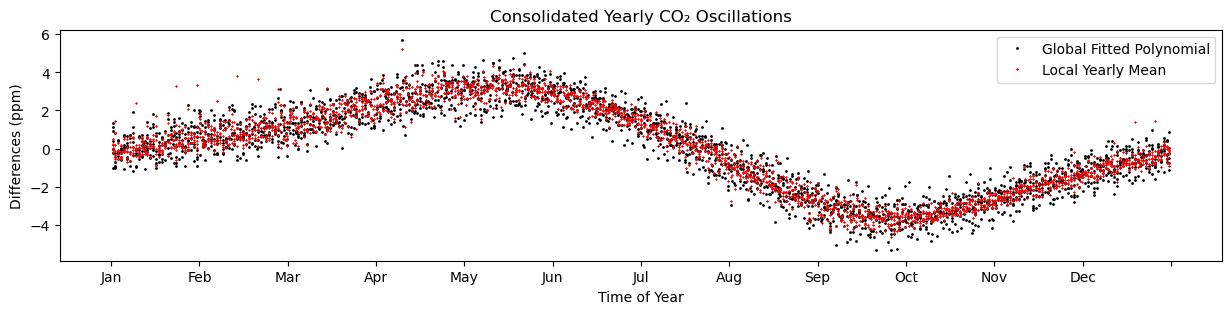

In [41]:
# Subtracting non-decimal part from the year to get precise time of year as opposed to using month column.
time_of_year = 12*(Mauna_Loa_df['decimal'] - Mauna_Loa_df['year'])
# time_of_year = 12*(Mauna_Loa_df['decimal']%1) # Alternative method

# Plotting is done as before.
plt.plot(time_of_year, y_global_difference, marker = 'o', markersize = 1, linewidth = 0, color = 'black')    # linewidth = 0 to hide the line without using plt.scatter() (Preference).
plt.plot(time_of_year, y_local_difference, marker = 'x', markersize = 1, linewidth = 0, color = 'red')       # marker = 'x' so plot underneath is more visible.

# x-axis ticks indicate the start of the month.
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', '']    # Empty string for extra tick to show the end of December.
plt.xticks(range(13), months)

# Labeling is done as before.
plt.title('Consolidated Yearly CO₂ Oscillations')
plt.xlabel('Time of Year')
plt.ylabel('Differences (ppm)')
plt.legend(['Global Fitted Polynomial', 'Local Yearly Mean'])
plt.show()

---
**[4.2] [10 marks]** Find a sensible way of interpolating the data you just plotted. Add the curve thus obtained to the plot in the previous question. You may notice that there is some roughness in your plot that indicates that we are at the limit of what we can sensibly analyse.

Note: this question is stated purposefully vaguely to give you a chance to showcase your talent (or your prowess with Google). As a timely reminder, any use of code found online must be carefully referenced, otherwise it will be deemed plagiarism.

---


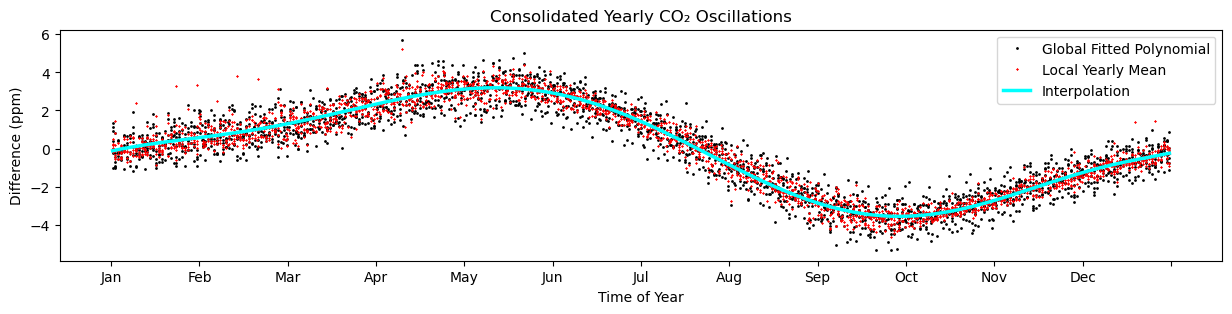

In [43]:
Mim_df = pd.DataFrame({'time of year': time_of_year, 'y local': y_local_difference})        # Creating a new dataframe for easier handling.
Mim_df_sorted = Mim_df.sort_values('time of year').reset_index().drop(columns = 'index')    # Sorted dataframe, reindexed, old index dropped.

# Polynomial fitting done as before.
coefficients = least_squares_solver_polynomial(Mim_df_sorted[['time of year','y local']],8)    # List of coefficients.
f = poly_builder(coefficients)                              # Creates the fitted polynomial.
y_consolidated_global = f(Mim_df_sorted['time of year'])    # Produces the fitted data.

# Plotting as before.
plt.plot(time_of_year, y_global_difference, marker = 'o', markersize = 1, linewidth = 0, color = 'black')    # linewidth = 0 to hide the line without using the less flexible plt.scatter().
plt.plot(time_of_year, y_local_difference, marker = 'x', markersize = 1, linewidth = 0, color = 'red')       # marker = 'x' so plot underneath is still visible.
plt.plot(Mim_df_sorted['time of year'], y_consolidated_global, color = 'cyan', linewidth = 2.5)              # Cyan and linewidth = 2.5 for better visability.

# Plot labeling as before.
plt.xticks(range(13), months)
plt.title('Consolidated Yearly CO₂ Oscillations')       
plt.xlabel('Time of Year')
plt.ylabel('Difference (ppm)')
plt.legend(['Global Fitted Polynomial', 'Local Yearly Mean','Interpolation'])

plt.show()

---
**[4.3] [5 marks]** You are now in a position to clearly separate overall trend, seasonal variation, and residual effects. Finish the project by creating a plot of the residual noise, similar to the bottom graph in the image below. Describe how the residual effects compare to the seasonal variation.

(You are welcome to provide all four plots together, but you will only be assessed on plotting the residual effects.)


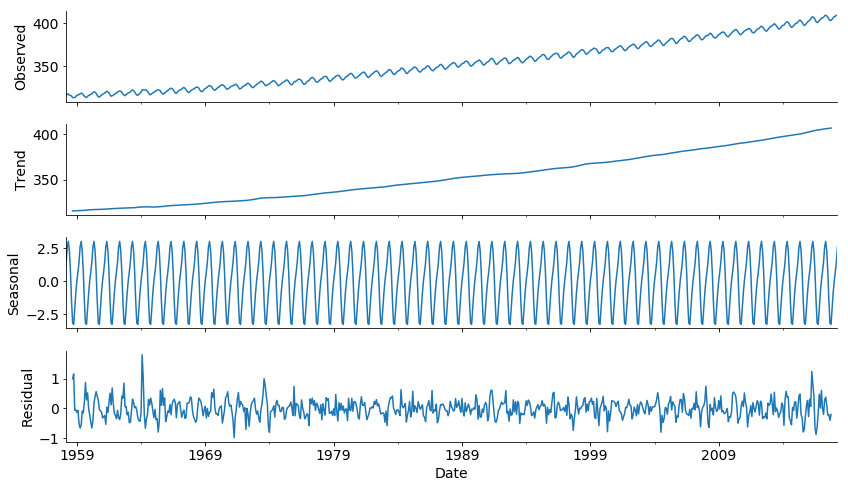

---


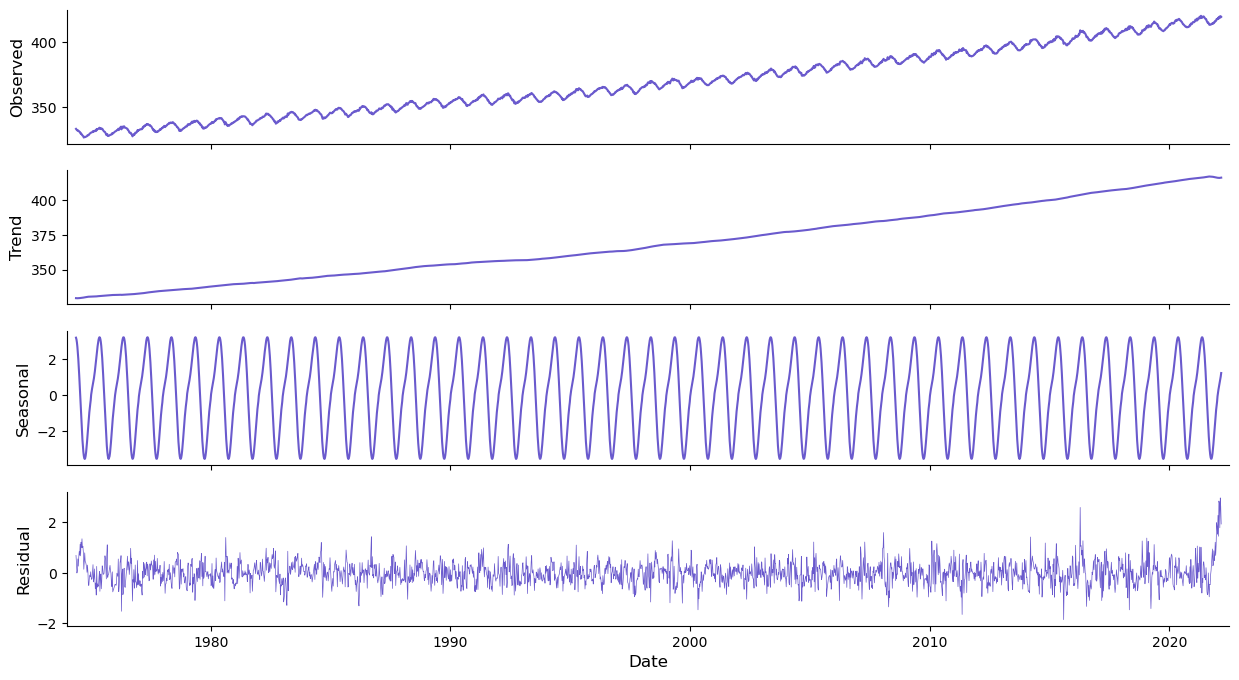

In [45]:
# Reference: https://matplotlib.org/stable/gallery/subplots_axes_and_figures/ganged_plots.html for subplot creation.
# Assigning variables for readability
y_obs = Mauna_Loa_df['average']              # Denotes the observed data.
y_trend = y_local                            # Denotes the trend derived by the local averaging.
y_seasonal = f(Mim_df['time of year'])       # Applies the polynomial derived from the interpolation of the sorted time data to the unsorted time data to produce data for the whole period.
y_residual = y_obs - y_trend - y_seasonal    # Seperates the observed data from the overall trend and seasonal variations to compute the residual effects.

# Configuring plots
plt.rcParams['figure.figsize'] = (15,8)             # Resizing for better visability.
fig, plot  = plt.subplots(4, 1, sharex = True)      # Creates 4 subplots on top of each other with a shared x axis.

# Plotting
plot[0].plot(x_data, y_data, color = 'slateblue')
plot[1].plot(x_data, y_trend, color = 'slateblue')
plot[2].plot(x_data, y_seasonal, color = 'slateblue')                    # Plots data onto each subplot.
plot[3].plot(x_data, y_residual, linewidth = 0.5, color = 'slateblue')   # Reduced linewidth for better visability. 

# Reduces empty space on plots
plt.xlim(1974,2022.5)

# Labeling
plt.xlabel('Date',fontsize = 'large')
plot[0].set_ylabel('Observed',fontsize = 'large')
plot[1].set_ylabel('Trend',fontsize = 'large')
plot[2].set_ylabel('Seasonal',fontsize = 'large')
plot[3].set_ylabel('Residual',fontsize = 'large')

# Removal of spines
for i in range(4):
    plot[i].spines['top'].set_visible(False)
    plot[i].spines['right'].set_visible(False)
    
plt.show()

# Resetting shape incase code blocks are ran out of order.
plt.rcParams['figure.figsize'] = (15,3)

*There seems to be no clear pattern to the residual data but there is a very obvious pattern to the seasonal data, with repeating peaks and troughs on a yearly basis. The residual data does not appear to repeat at all.*